# Explore here

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('/workspaces/pauline---machine-learning-python-template/data/raw/AB_NYC_2019.csv')
pd.set_option('display.max_columns', None)
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
df.shape

(48895, 16)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
n_unicos = df.nunique()
n_unicos

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [23]:
#Identificamos ya y eliminamos elementos que no nos van a servir como :

#Los 0 en la columna price que no tienen sentido, eliminamos esas líneas: 
df = df[df['price'] > 0]

#host_name y name --> se ve que hay duplicados y no nos sirve porque tenemos las columnas ID 

df.drop(['host_name'], axis=1, inplace=True)
df.drop(['name'], axis=1, inplace=True)

#Ahora nos queda esas columnas : 
df.columns = df.columns.str.strip()
print(df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [32]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())

0

In [34]:
#Descripción básica :
df.describe(include='all').T.round(1)



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48884.0,NaN,NaN,NaN,19016793.406677,10984315.037942,2539.0,9470547.5,19675740.5,29152966.75,36487245.0
host_id,48884.0,NaN,NaN,NaN,67622034.561124,78616662.300425,2438.0,7817310.25,30792573.5,107434423.0,274321313.0
neighbourhood_group,48884,5,Manhattan,21660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48884,221,Williamsburg,3919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48884.0,NaN,NaN,NaN,40.728953,0.054532,40.49979,40.6901,40.72308,40.76312,40.91306
longitude,48884.0,NaN,NaN,NaN,-73.952176,0.046159,-74.24442,-73.98308,-73.955685,-73.93629,-73.71299
room_type,48884,3,Entire home/apt,25407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48884.0,NaN,NaN,NaN,152.755053,240.17026,10.0,69.0,106.0,175.0,10000.0
minimum_nights,48884.0,NaN,NaN,NaN,7.029887,20.512224,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48884.0,NaN,NaN,NaN,23.271991,44.551331,0.0,1.0,5.0,24.0,629.0


In [37]:
# Revisamos los valores faltantes:
df.isnull().mean()*100




id                                 0.00000
host_id                            0.00000
neighbourhood_group                0.00000
neighbourhood                      0.00000
latitude                           0.00000
longitude                          0.00000
room_type                          0.00000
price                              0.00000
minimum_nights                     0.00000
number_of_reviews                  0.00000
last_review                       20.56092
reviews_per_month                 20.56092
calculated_host_listings_count     0.00000
availability_365                   0.00000
dtype: float64

<Axes: >

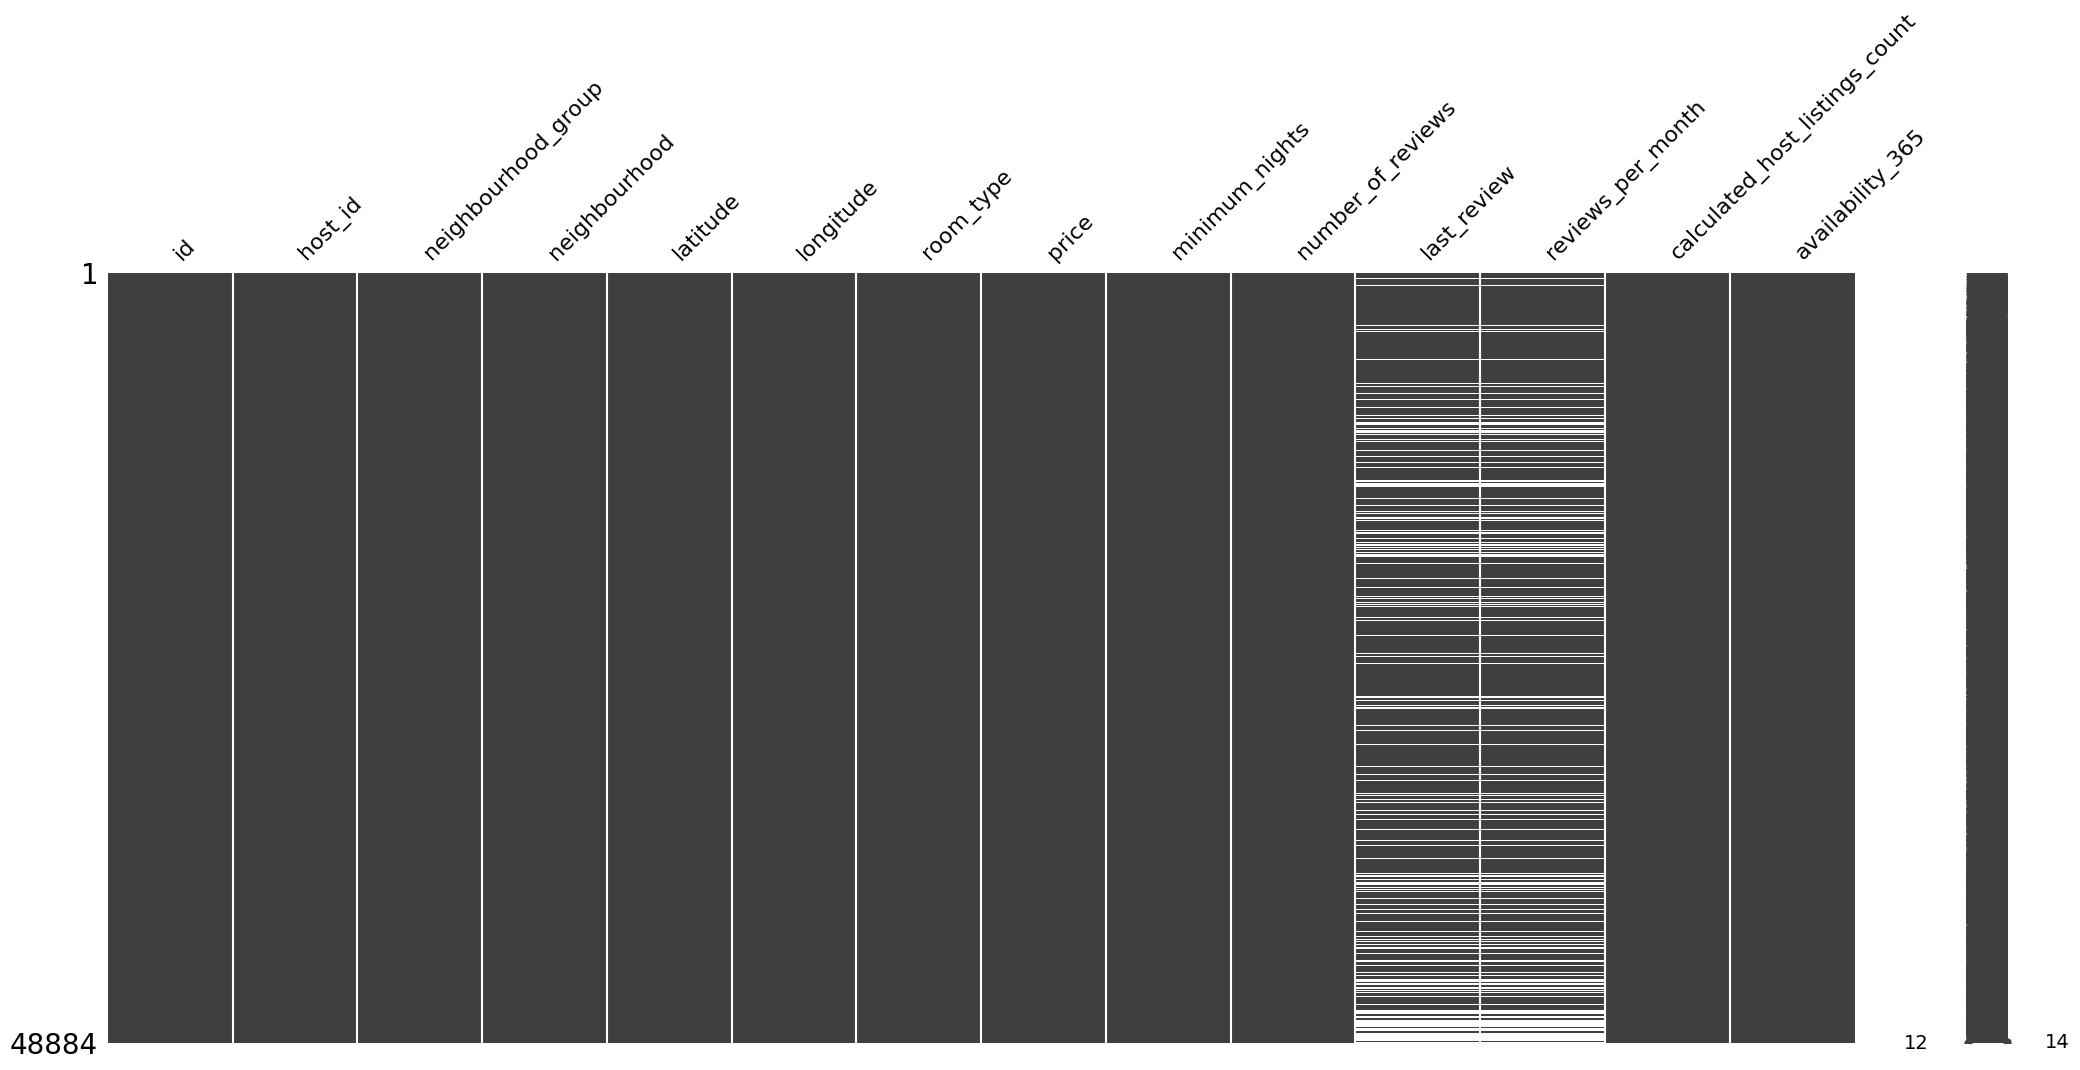

In [38]:
#Y lo vizualisamos : 

msno.matrix(df)

In [ ]:
# Observamos que 1/5 de de las lineas de last_reviews y review_x_month tienen valores nulos 
# Para esas 2 columnas, son exactamente las mismas lineas que tienen los nulos, lo que es lógico porque si no hay last_review significa que no hay ninguna review y entonces 0 x month








In [ ]:
#se puede quitar neighbouroh que hay 221 -->  podemos reemplazar esa cat con el % a que frq aparece ?? --> a chequear si sacamos algo de eso

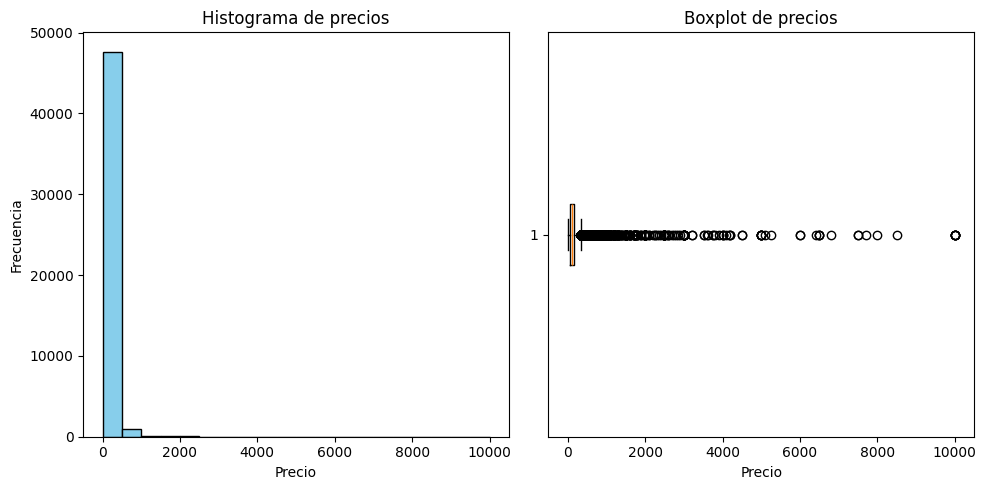

In [12]:
# Estudiamos precios con histogramo y boxplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precios')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de precios')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [13]:
# Transformamos la variable respuesta/dependiente/y/target a escala logarítmica

df['log_precios'] = np.log(df['price'])

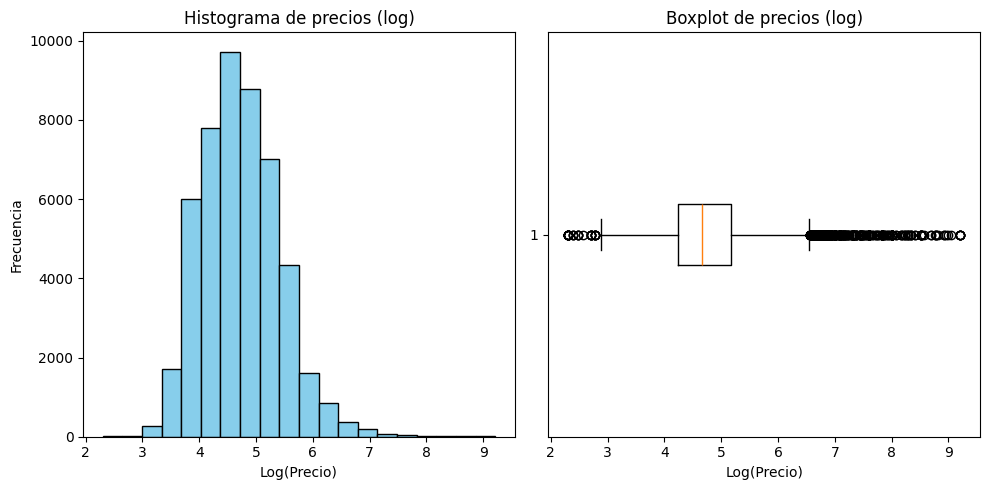

In [14]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['log_precios'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precios (log)')
ax[0].set_xlabel('Log(Precio)')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['log_precios'], vert=False)
ax[1].set_title('Boxplot de precios (log)')
ax[1].set_xlabel('Log(Precio)')

# Mostrar la figura
plt.tight_layout()
plt.show()

hay que extrapola5

In [25]:
sorted_barrios = sorted(df['neighbourhood_group'].unique())
#crear una columna y poner a cada neighbourg group un numero para hacer tipo el one hot coding y despues poder analizar
df['neighbourhood_group']
#iterar sobre columa 
for barrio in df['neighbourhood_group']:
    if barrio == 'Brooklyn':




SyntaxError: incomplete input (1972696728.py, line 4)